In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
import pickle
from sklearn.utils import shuffle
import joblib  

from sklearn.model_selection import cross_val_score
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore",category=DeprecationWarning)
warnings.filterwarnings(action="ignore",category=FutureWarning)


%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

In [5]:
#IMPORTAMOS DATASET
total= pd.read_csv("Twitch_game_data.csv", sep=",", encoding="'cp1252'")
# elimino la columna "Avg_viewer_ratio" porque es la división entre Avg.viewers y Avg.channels
total=total.drop(["Avg_viewer_ratio", "Rank"], axis=1)  
total

,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels
0,League of Legends,1,2016,94377226,1362044 hours,530270,2903,129172,127021,1833
1,Counter-Strike: Global Offensive,1,2016,47832863,830105 hours,372654,2197,120849,64378,1117
2,Dota 2,1,2016,45185893,433397 hours,315083,1100,44074,60815,583
3,Hearthstone,1,2016,39936159,235903 hours,131357,517,36170,53749,317
4,Call of Duty: Black Ops III,1,2016,16153057,1151578 hours,71639,3620,214054,21740,1549
...,...,...,...,...,...,...,...,...,...,...
16995,Tom Clancy's The Division 2,1,2023,666943(118.3%),97138(59.5%),2759(49.9%),249(48.2%),12805(68.1%),897(118.2%),130(60.5%)
16996,Persona 5 Royal,1,2023,664503(-2.9%),68310(2.7%),10494(19.6%),198(4.8%),7475(4.8%),894(-2.9%),91(2.2%)
16997,Bloodborne,1,2023,663078(59.1%),45522(31.8%),9455(30.4%),117(8.3%),8355(27.5%),892(59.3%),61(32.6%)
16998,PowerWash Simulator,1,2023,657644(356.0%),18494(53.7%),63757(473.9%),192(346.5%),6589(42.3%),885(356.2%),24(50%)


In [6]:
#ELIMINAR SIGNOS 
total["Hours_watched"] = total["Hours_watched"].str.split("(", expand=True)[0]
total["Peak_channels"] = total["Peak_channels"].str.split("(", expand=True)[0]
total["Avg_channels"] = total["Avg_channels"].str.split("(", expand=True)[0]
total["Hours_Streamed"] = total["Hours_Streamed"].str.split("(", expand=True)[0]
total["Hours_Streamed"] = total["Hours_Streamed"].str.split("h", expand=True)[0]
total["Peak_viewers"] = total["Peak_viewers"].str.split("(", expand=True)[0]
total["Avg_viewers"] = total["Avg_viewers"].str.split("(", expand=True)[0]
total["Streamers"] = total["Streamers"].str.split("(", expand=True)[0]
total

,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels
0,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833
1,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117
2,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583
3,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317
4,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549
...,...,...,...,...,...,...,...,...,...,...
16995,Tom Clancy's The Division 2,1,2023,666943,97138,2759,249,12805,897,130
16996,Persona 5 Royal,1,2023,664503,68310,10494,198,7475,894,91
16997,Bloodborne,1,2023,663078,45522,9455,117,8355,892,61
16998,PowerWash Simulator,1,2023,657644,18494,63757,192,6589,885,24


In [7]:
#CONVERTIR TODAS LAS VARIABLES A float/int
total['Hours_watched'] = total['Hours_watched'].astype(float)
total['Year'] = total['Year'].astype(float)
total['Month'] = total['Month'].astype(float)
total['Hours_Streamed'] = total['Hours_Streamed'].astype(float)
total['Peak_viewers'] = total['Peak_viewers'].astype(float)
total['Peak_channels'] = total['Peak_channels'].astype(float)
total['Streamers'] = total['Streamers'].astype(float)
total['Avg_viewers'] = total['Avg_viewers'].astype(float)
total['Avg_channels'] = total['Avg_channels'].astype(float)
total['Hours_watched'] = total['Hours_watched'].astype(int)
total['Year'] = total['Year'].astype(int)
total['Month'] = total['Month'].astype(int)
total['Hours_Streamed'] = total['Hours_Streamed'].astype(int)
total['Peak_viewers'] = total['Peak_viewers'].astype(int)
total['Peak_channels'] = total['Peak_channels'].astype(int)
total['Streamers'] = total['Streamers'].astype(int)
total['Avg_viewers'] = total['Avg_viewers'].astype(int)
total['Avg_channels'] = total['Avg_channels'].astype(int)

In [8]:
#EMPEZAMOS A CREAR EL TARGET CON 1 Y 0 EN FUNCION DE SI SIGUE ENTRE LOS 200 JUEGOS MAS VISUALIZADOS A 1 AÑO VISTA.
#(1 SIGUE/0 NO SIGUE)
total1=total.set_index(["Year"])
#ADEMAS, SI ES 1, AÑADE EL VALOR DE HOURS_WATCHED DEL AÑO +1 AL AÑO. POR EJEMPLO 2016 SE AÑADE HOURS WATCHED DE 2017.

In [9]:
#AÑO 2016 EN COMPARACION CON 2017
t2016=total1.loc[2016]
t2017=total1.loc[2017]
total2016=pd.concat([t2016,t2017])
total2016=total2016.reset_index()
target2016= []
hours_watched_2017_list=[]

for mes in range(1,13):
    total2016[(total2016["Month"] == mes) & (total2016["Year"]==2016)]["Game"].values 
    for game in total2016[(total2016["Month"] == mes) & (total2016["Year"]==2016)]["Game"].values:
        if game in total2016[(total2016["Month"] == mes) & (total2016["Year"]==2017)]["Game"].values:
            target2016.append(1)
            hours_watched_2017 = t2017[t2017['Game'] == game]['Hours_watched'].iloc[0]
            hours_watched_2017_list.append(hours_watched_2017)
        else:
            target2016.append(0)

In [10]:
len(hours_watched_2017_list)

1322

In [11]:
targete2016=pd.DataFrame(target2016)
targete2016[0].value_counts()

1    1322
0    1078
Name: 0, dtype: int64

In [12]:
#AÑO 2017 EN COMPARACION CON 2018
t2017=total1.loc[2017]
t2018=total1.loc[2018]
to2017=pd.concat([t2017,t2018])
total2017=to2017.reset_index()

target2017= []
hours_watched_2018_list=[]

for mes in range(1,13):
    total2017[(total2017["Month"] == mes) & (total2017["Year"]==2017)]["Game"].values
    for game in total2017[(total2017["Month"] == mes) & (total2017["Year"]==2017)]["Game"].values:
        if game in total2017[(total2017["Month"] == mes) & (total2017["Year"]==2018)]["Game"].values:
            target2017.append(1)
            hours_watched_2018 = t2018[t2018['Game'] == game]['Hours_watched'].iloc[0]
            hours_watched_2018_list.append(hours_watched_2018)
        else:
            target2017.append(0)


In [13]:
#AÑO 2018 EN COMPARACION CON 2019
t2018=total1.loc[2018]
t2019=total1.loc[2019]
to2018=pd.concat([t2018,t2019])
total2018=to2018.reset_index()

target2018= []
hours_watched_2019_list=[]

for mes in range(1,13):
    total2018[(total2018["Month"] == mes) & (total2018["Year"]==2018)]["Game"].values
    for game in total2018[(total2018["Month"] == mes) & (total2018["Year"]==2018)]["Game"].values:
        if game in total2018[(total2018["Month"] == mes) & (total2018["Year"]==2019)]["Game"].values:
            target2018.append(1)
            hours_watched_2019 = t2019[t2019['Game'] == game]['Hours_watched'].iloc[0]
            hours_watched_2019_list.append(hours_watched_2019)
        else:
            target2018.append(0)

In [14]:
#AÑO 2019 EN COMPARACION CON 2020
t2019=total1.loc[2019]
t2020=total1.loc[2020]
to2019=pd.concat([t2019,t2020])
total2019=to2019.reset_index()

target2019= []
hours_watched_2020_list=[]

for mes in range(1,13):
    total2019[(total2019["Month"] == mes) & (total2019["Year"]==2019)]["Game"].values
    for game in total2019[(total2019["Month"] == mes) & (total2019["Year"]==2019)]["Game"].values:
        if game in total2019[(total2019["Month"] == mes) & (total2019["Year"]==2020)]["Game"].values:
            target2019.append(1)
            hours_watched_2020 = t2020[t2020['Game'] == game]['Hours_watched'].iloc[0]
            hours_watched_2020_list.append(hours_watched_2020)
        else:
            target2019.append(0)

In [15]:
#AÑO 2020 EN COMPARACION CON 2021
t2020=total1.loc[2020]
t2021=total1.loc[2021]
to2020=pd.concat([t2020,t2021])
total2020=to2020.reset_index()

target2020= []
hours_watched_2021_list=[]

for mes in range(1,13):
    total2020[(total2020["Month"] == mes) & (total2020["Year"]==2020)]["Game"].values
    for game in total2020[(total2020["Month"] == mes) & (total2020["Year"]==2020)]["Game"].values:
        if game in total2020[(total2020["Month"] == mes) & (total2020["Year"]==2021)]["Game"].values:
            target2020.append(1)
            hours_watched_2021 = t2021[t2021['Game'] == game]['Hours_watched'].iloc[0]
            hours_watched_2021_list.append(hours_watched_2021)
        else:
            target2020.append(0)

In [16]:
#AÑO 2022 EN COMPARACION CON 2021
t2021=total1.loc[2021]
t2022=total1.loc[2022]
to2021=pd.concat([t2021,t2022])
total2021=to2021.reset_index()

target2021= []
hours_watched_2022_list=[]

for mes in range(1,13):
    total2021[(total2021["Month"] == mes) & (total2021["Year"]==2021)]["Game"].values
    for game in total2021[(total2021["Month"] == mes) & (total2021["Year"]==2021)]["Game"].values:
        if game in total2021[(total2021["Month"] == mes) & (total2021["Year"]==2022)]["Game"].values:
            target2021.append(1)
            hours_watched_2022 = t2022[t2022['Game'] == game]['Hours_watched'].iloc[0]
            hours_watched_2022_list.append(hours_watched_2022)
        else:
            target2021.append(0)

In [17]:
#TARGET= 1 /0 CLASIFICACION BINARIA
target=target2016+target2017+target2018+target2019+target2020+target2021

In [18]:
#HOURS WATCHED AÑO +1
Prevision_1_año_Hours_watched=hours_watched_2017_list + hours_watched_2018_list +hours_watched_2019_list + hours_watched_2020_list + hours_watched_2021_list +hours_watched_2022_list

In [19]:
#CALCULO CUANTOS 1 Y 0 HAY
df=pd.concat([t2016,t2017,t2018,t2019,t2020,t2021])
df["Target"]=target
df["Target"].value_counts()

1    8492
0    5908
Name: Target, dtype: int64

In [20]:
target_rec= df["Target"].value_counts()
target_rec

1    8492
0    5908
Name: Target, dtype: int64

In [21]:
recuento= pd.DataFrame(target_rec)
recuento=recuento.reset_index()
recuento.rename(columns={"index":"Clas. Binaria",0:"Recuento"},
               inplace=True)
recuento

,Clas. Binaria,Target
0,1,8492
1,0,5908


In [22]:
recuento.to_csv("CSV/Recuento 0 y 1.csv", sep=",", index = True)

<AxesSubplot:xlabel='Peak_viewers', ylabel='Hours_watched'>

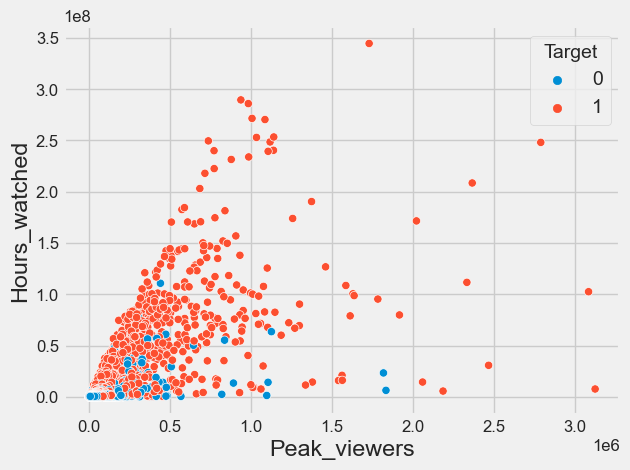

In [23]:
sns.scatterplot(data=df,
               x="Peak_viewers",
               y="Hours_watched",
               hue="Target")

<AxesSubplot:>

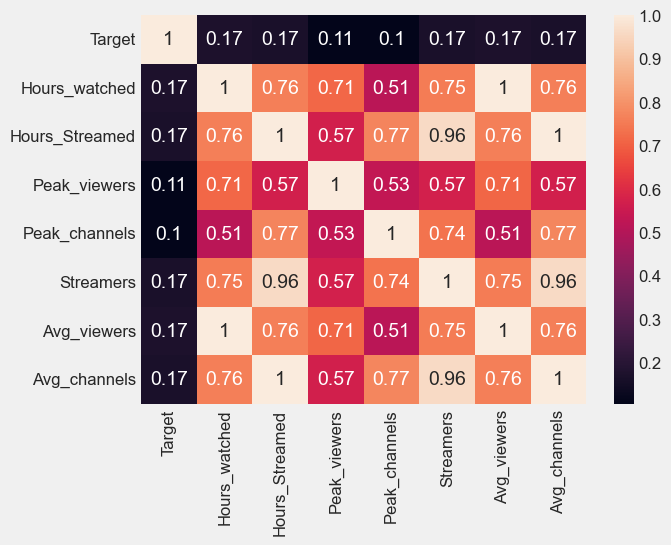

In [24]:
#MATRIZ DE CORRELACION ENTRE TODAS LAS VARIABLES EN FUNCION DEL TARGET
#AL SER MODELOS DE CLASIFICACION NOS DA IGUAL LA CORRELACION LINEAL
sns.heatmap(df[['Target','Hours_watched','Hours_Streamed','Peak_viewers','Peak_channels','Streamers','Avg_viewers','Avg_channels']].corr(), annot=True)

In [25]:
#OBETENER X_TRAIN,X_TEST,Y_TRAIN, Y_TEST
XY = df[['Hours_watched','Hours_Streamed','Peak_viewers','Peak_channels','Streamers','Avg_viewers','Avg_channels','Target']]
nuevaX_Y=shuffle(XY)

X_clas = nuevaX_Y[['Hours_watched','Hours_Streamed','Peak_viewers','Peak_channels','Streamers','Avg_viewers','Avg_channels']]
y_clas = nuevaX_Y['Target']

X_train, X_test, y_train, y_test = train_test_split(X_clas,y_clas, test_size=0.2, random_state=42)



In [26]:
#ESTANDARIZACION
scaler = StandardScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

0.6256944444444444
0.6134672619047619
0.9768957345971564
0.7536563071297989
0.5526257196475715


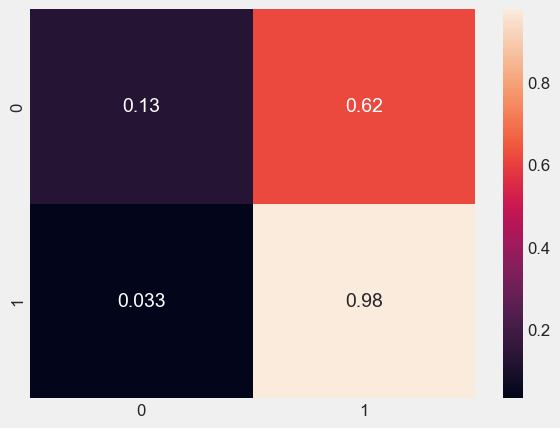

In [288]:
#PRIMER MODELO: REGRESION LOGISTICA
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

results_rg=accuracy_score(y_test,y_pred)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
c_mat = confusion_matrix(y_test,y_pred)
c_mat
results_rg=accuracy_score(y_test,y_pred)
result_rg_r=recall_score(y_test, y_pred)
sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);
results_rg_re=recall_score(y_test,y_pred)
results_rg_p=precision_score(y_test,y_pred)

0.6256944444444444
0.6134672619047619
0.9768957345971564
0.7536563071297989
0.5526257196475715
Confusion matrix: [[ 153 1039]
 [  39 1649]]


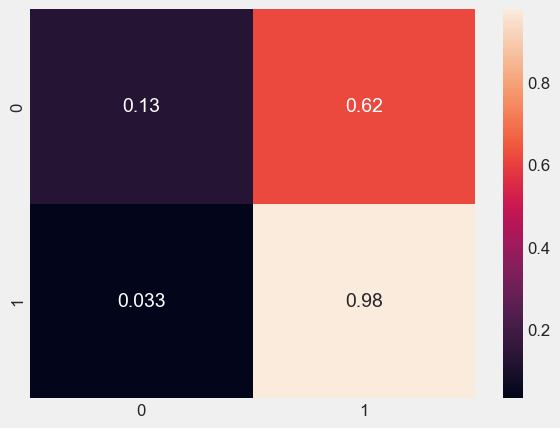

In [289]:
#ARBOL DE DECISION PARA VER MEJORES COMBINACIONES
tree = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2,4,6],
'min_samples_leaf': np.arange(1,4)}

grid_tree = GridSearchCV(tree, parameters, scoring='accuracy', cv=5)

grid_tree.fit(X_train, y_train)

tree_predictions = grid_tree.predict(X_test)
results_tree= accuracy_score(y_test, tree_predictions)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
c_mat = confusion_matrix(y_test,y_pred)
print("Confusion matrix:", c_mat)
sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);
results_tree_r= recall_score(y_test, tree_predictions)
results_tree_p= precision_score(y_test, tree_predictions)


In [290]:
#SVM -- VER QUE C Y GAMMA ES LA MEJOR PARA LUEGO APLICARLO
C_values = [1,10]
gamma_values = [1,10]

best_score = 0
best_params = {'C': None, 'gamma': None}
for C in C_values:
    for gamma in gamma_values:
        svc = svm.SVC(C=C, gamma=gamma)
        svc.fit(X_train, y_train)
        score = svc.score(X_train, y_train)
        
        if score > best_score:
            best_score = score
            best_params['C'] = C
            best_params['gamma'] = gamma
            
best_score, best_params

(0.7615451388888889, {'C': 10, 'gamma': 10})

0.6256944444444444
0.6134672619047619
0.9768957345971564
0.7536563071297989
0.5526257196475715
Confusion matrix: [[ 153 1039]
 [  39 1649]]


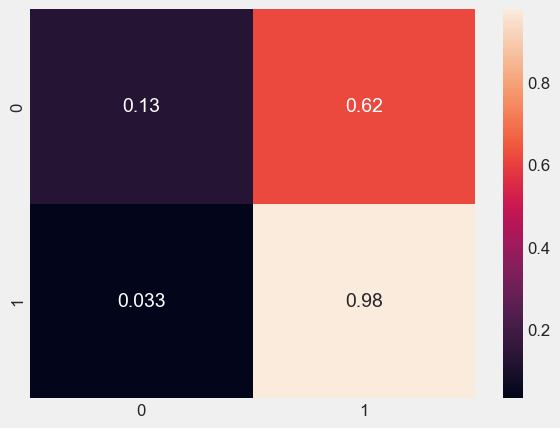

In [291]:
svm_clf = SVC(C=10,gamma = 10)
svm_clf.fit(X_train, y_train)
svm_predictions = svm_clf.predict(X_test)
results_svm= accuracy_score(y_test, svm_predictions)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
c_mat = confusion_matrix(y_test,y_pred)
print("Confusion matrix:", c_mat)
sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);
results_svm_r=recall_score(y_test, y_pred)
results_svm_p=precision_score(y_test, y_pred)


0.7274305555555556
0.726998491704374
0.8566350710900474
0.7865107424530866
0.7005490791691849
Confusion matrix: [[ 649  543]
 [ 242 1446]]


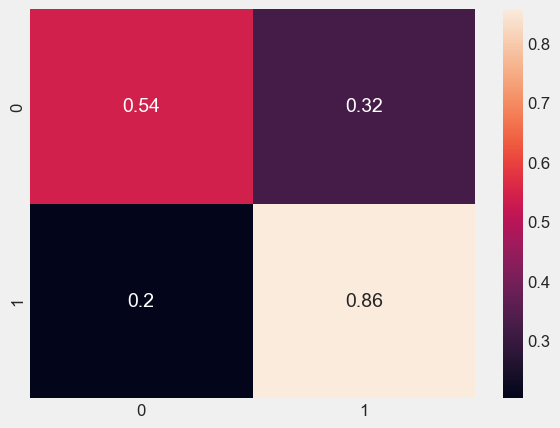

In [292]:
#HACEMOS UN VOTING CON HARD
rnd_clf = RandomForestClassifier(n_estimators = 100)
svm_clf = SVC(C=10,gamma = 10)
votingh_clf = VotingClassifier(
    estimators = [('lr', log_reg), ('rf', rnd_clf), ('svc', svm_clf)],
voting = "hard"
)
votingh_clf.fit(X_train, y_train)
for clf in log_reg, rnd_clf, svm_clf, votingh_clf:
    clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
results_voting_hard= accuracy_score(y_test, y_pred)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
c_mat = confusion_matrix(y_test,y_pred)
print("Confusion matrix:", c_mat)
sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);
results_voting_hard_r=recall_score(y_test, y_pred)
results_voting_hard_p=precision_score(y_test, y_pred)



0.7291666666666666
0.7420042643923241
0.8246445497630331
0.7811447811447813
0.7093021406533286
Confusion matrix: [[ 708  484]
 [ 296 1392]]


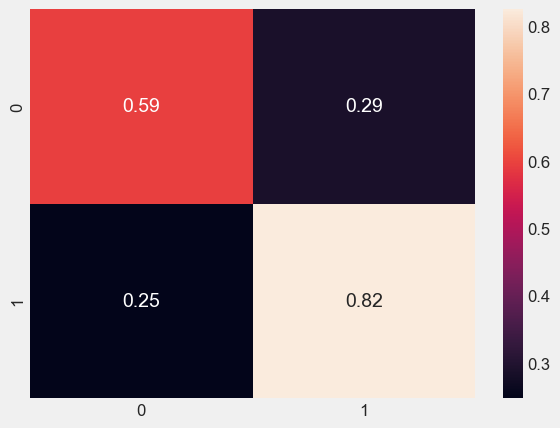

In [293]:
#HACEMOS UN VOTING CON SOFT
rnd_clf = RandomForestClassifier(n_estimators = 100)
svm_clf = SVC(gamma = 10,probability = True)
votings_clf = VotingClassifier(
    estimators = [('lr', log_reg), ('rf', rnd_clf), ('svc', svm_clf)],
voting = "soft"
)
votings_clf.fit(X_train, y_train)
for clf in log_reg, rnd_clf, svm_clf, votings_clf:
    clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
results_voting_soft= accuracy_score(y_test, y_pred)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
c_mat = confusion_matrix(y_test,y_pred)
print("Confusion matrix:", c_mat)
sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);
results_voting_soft_r=recall_score(y_test, y_pred)
results_voting_soft_p=precision_score(y_test, y_pred)

0.7142361111111111
0.71571072319202
0.8501184834123223
0.777145951800704
0.6859652819746176
Confusion matrix: [[ 622  570]
 [ 253 1435]]


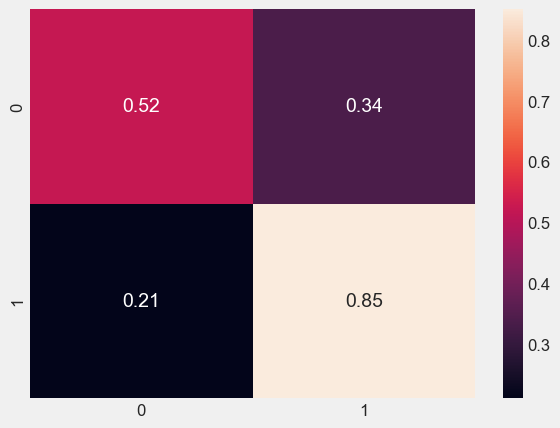

In [294]:
#HACEMOS UN RANDOMFORESTCLASSIFIER
rf= RandomForestClassifier()
parameters = {'max_depth': [2,4,6],
'min_samples_leaf': np.arange(1,4)}
rf_clf = GridSearchCV(rf,parameters, cv=5)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
results_rf= accuracy_score(y_test, y_pred)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
c_mat = confusion_matrix(y_test,y_pred)
print("Confusion matrix:", c_mat)
sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);
results_rf_r=recall_score(y_test,y_pred)
results_rf_p=precision_score(y_test,y_pred)

In [295]:
rf_clf.best_params_

{'max_depth': 6, 'min_samples_leaf': 1}

0.728125
0.7331272539927872
0.8430094786729858
0.7842380821162855
0.7042228601418621
Confusion matrix: [[ 674  518]
 [ 265 1423]]


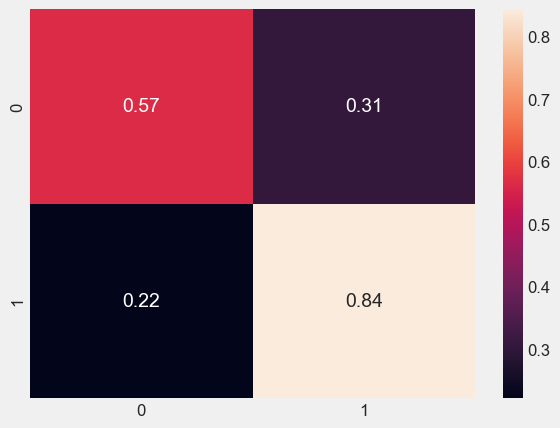

In [296]:
#HACEMOS UN BAGGING 
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_depth=6, min_samples_split=6),n_estimators = 500,
    bootstrap = True)
rf_clf = GridSearchCV(rf,parameters, cv=5)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
results_bagg= (accuracy_score(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
c_mat = confusion_matrix(y_test,y_pred)
print("Confusion matrix:", c_mat)
sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);
results_bagg_r= (recall_score(y_test, y_pred))
results_bagg_p= (precision_score(y_test, y_pred))

0.7090277777777778
0.74230330672748
0.7713270142180095
0.7565368971528181
0.6960661916727632
Confusion matrix: [[ 740  452]
 [ 386 1302]]


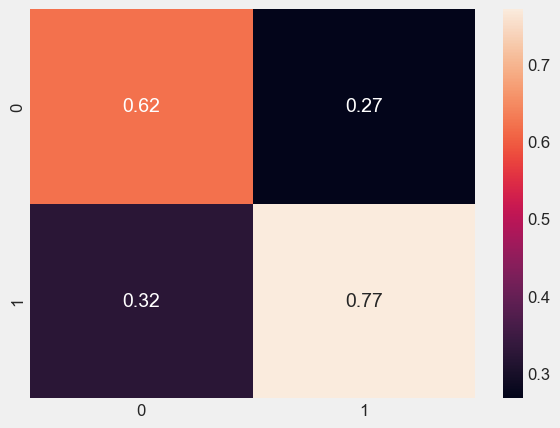

In [297]:
#HACEMOS UN ADACLASSIFIER
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=6, min_samples_split=6),n_estimators = 500,
    algorithm = "SAMME.R", learning_rate = 0.5,)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
results_ada=(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
c_mat = confusion_matrix(y_test,y_pred)
print("Confusion matrix:", c_mat)
sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True); 
results_ada_r=(recall_score(y_test, y_pred))
results_ada_p=(precision_score(y_test, y_pred))

0.7336805555555556
0.7482479784366577
0.8222748815165877
0.7835167936776742
0.7152481790133274
Confusion matrix: [[ 725  467]
 [ 300 1388]]


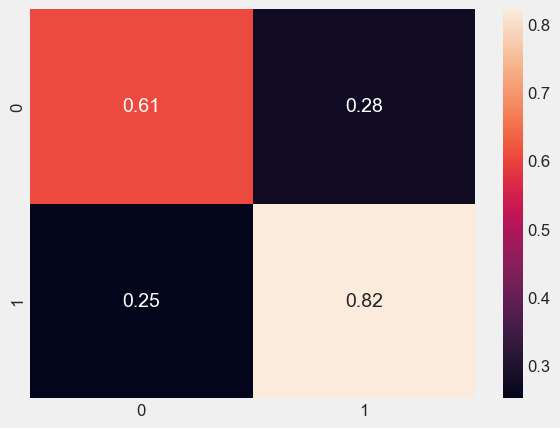

In [298]:
#HACEMOS UN GRADIENTBOOSTINGCLASSIFIER
gb = GradientBoostingClassifier()
parameters = {'max_depth': [2,4,6],
'min_samples_leaf': np.arange(1,4)}
gb_clf = GridSearchCV(gb,parameters, cv=5)
gb_c=gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)
results_gb=(accuracy_score(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
c_mat = confusion_matrix(y_test,y_pred)
plt.savefig('confusionmatrix_clas.png')
print("Confusion matrix:", c_mat)
matriz_confusion_clas=sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);
results_gb_r=(recall_score(y_test, y_pred))
results_gb_p=(precision_score(y_test, y_pred))



In [29]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In [300]:
c_mat

array([[ 725,  467],
       [ 300, 1388]], dtype=int64)

[0]	validation_0-logloss:0.62495
[1]	validation_0-logloss:0.58552
[2]	validation_0-logloss:0.56070
[3]	validation_0-logloss:0.54536
[4]	validation_0-logloss:0.53675
[5]	validation_0-logloss:0.53212
[6]	validation_0-logloss:0.52816
[7]	validation_0-logloss:0.52613
[8]	validation_0-logloss:0.52414
[9]	validation_0-logloss:0.52236
[10]	validation_0-logloss:0.52059
[11]	validation_0-logloss:0.51999
[12]	validation_0-logloss:0.51885
[13]	validation_0-logloss:0.51948
[14]	validation_0-logloss:0.51870
[15]	validation_0-logloss:0.51861
[16]	validation_0-logloss:0.51865
[17]	validation_0-logloss:0.51898
[18]	validation_0-logloss:0.51891
[19]	validation_0-logloss:0.51898
[20]	validation_0-logloss:0.51917
[21]	validation_0-logloss:0.51917
[22]	validation_0-logloss:0.51932
[23]	validation_0-logloss:0.51849
[24]	validation_0-logloss:0.51886
[25]	validation_0-logloss:0.51882
[26]	validation_0-logloss:0.51892
[27]	validation_0-logloss:0.51930
[28]	validation_0-logloss:0.51994
[29]	validation_0-loglos

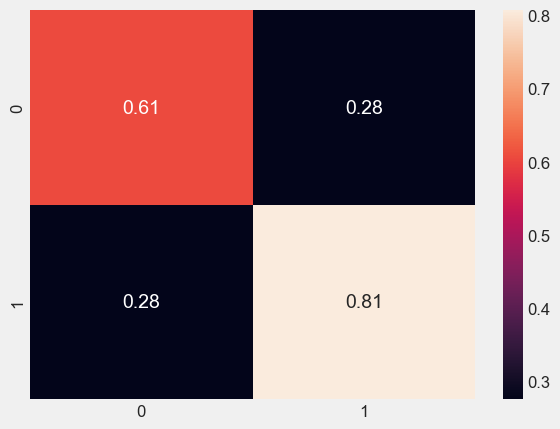

In [30]:
#HACEMOS UN XGBOOSTCLASSIFIER
xgb_clf = XGBClassifier(n_estimators=100, use_label_encoder=False)
xgb_clf.fit(X_train, y_train, eval_set = [(X_val, y_val)])
y_pred = xgb_clf.predict(X_test)
results_xgb=(accuracy_score(y_test, y_pred))
results_xgb
results_rg=accuracy_score(y_test,y_pred)
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))
print(f1_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
c_mat = confusion_matrix(y_test,y_pred)
print("Confusion matrix:", c_mat)
sns.heatmap(c_mat/c_mat.sum(axis=1), annot=True);
results_xgb_r=(recall_score(y_test, y_pred))
results_xgb_p=(precision_score(y_test, y_pred))


In [360]:
resultados = [results_rg,results_tree,results_svm,results_voting_hard,results_voting_soft,results_bagg, results_rf, results_ada, results_gb, results_xgb]
algoritmos = ["Logistic Regresion","Arbol de decision","Vector soporte","Voting hard","Voting soft","Bagging DT", "Random Forest", "Ada Boost", "GradientBoosting", "XGBoost"]

result = pd.Series(resultados, algoritmos).sort_values(ascending=False)
result

GradientBoosting      0.733681
Voting soft           0.729167
Bagging DT            0.728125
Voting hard           0.727431
Logistic Regresion    0.725347
XGBoost               0.725347
Vector soporte        0.721181
Random Forest         0.714236
Ada Boost             0.709028
Arbol de decision     0.700694
dtype: float64

In [303]:
result_a= pd.DataFrame(result)
result_a=result_a.reset_index()
result_a.rename(columns={"index":"Modelo",0:"Score Accuracy"},
               inplace=True)
result_a

,Modelo,Score Accuracy
0,GradientBoosting,0.733681
1,Voting soft,0.729167
2,Bagging DT,0.728125
3,Voting hard,0.727431
4,Logistic Regresion,0.725347
5,XGBoost,0.725347
6,Vector soporte,0.721181
7,Random Forest,0.714236
8,Ada Boost,0.709028
9,Arbol de decision,0.700694


In [304]:
result_a.to_csv("CSV/Accuracy modelos clasificacion.csv", sep=",", index = True)

In [361]:
resultados_recall = [results_rg_re,results_tree_r,results_svm_r,results_voting_hard_r,results_voting_soft_r,results_bagg_r, results_rf_r, results_ada_r, results_gb_r, results_xgb_r]
algoritmos = ["Logistic Regresion","Arbol de decision","Vector soporte","Voting hard","Voting soft","Bagging DT", "Random Forest", "Ada Boost", "GradientBoosting", "XGBoost"]

result_recall = pd.Series(resultados_recall, algoritmos).sort_values(ascending=False)
result_recall

Logistic Regresion    0.976896
Vector soporte        0.976896
Voting hard           0.856635
Random Forest         0.850118
Bagging DT            0.843009
Voting soft           0.824645
GradientBoosting      0.822275
Arbol de decision     0.794431
XGBoost               0.793839
Ada Boost             0.771327
dtype: float64

In [306]:
result_re= pd.DataFrame(result_recall)
result_re=result_re.reset_index()
result_re.rename(columns={"index":"Modelo",0:"Score Recall"},
               inplace=True)
result_re

,Modelo,Score Recall
0,Logistic Regresion,0.976896
1,Vector soporte,0.976896
2,Voting hard,0.856635
3,Random Forest,0.850118
4,Bagging DT,0.843009
5,Voting soft,0.824645
6,GradientBoosting,0.822275
7,Arbol de decision,0.794431
8,XGBoost,0.793839
9,Ada Boost,0.771327


In [307]:
result_re.to_csv("CSV/Recall modelos clasificacion.csv", sep=",", index = True)

In [362]:
resultados_precision = [results_rg_p,results_tree_p,results_svm_p,results_voting_hard_p,results_voting_soft_p,results_bagg_p, results_rf_p, results_ada_p, results_gb_p, results_xgb_p]
algoritmos = ["Logistic Regresion","Arbol de decision","Vector soporte","Voting hard","Voting soft","Bagging DT", "Random Forest", "Ada Boost", "GradientBoosting", "XGBoost"]

resultados_precision = pd.Series(resultados_precision, algoritmos).sort_values(ascending=False)
resultados_precision

XGBoost               0.751542
GradientBoosting      0.748248
Ada Boost             0.742303
Voting soft           0.742004
Bagging DT            0.733127
Voting hard           0.726998
Arbol de decision     0.722522
Random Forest         0.715711
Logistic Regresion    0.613467
Vector soporte        0.613467
dtype: float64

In [309]:
result_prec= pd.DataFrame(resultados_precision)
result_prec=result_prec.reset_index()
result_prec.rename(columns={"index":"Modelo",0:"Score Precision"},
               inplace=True)
result_prec

,Modelo,Score Precision
0,XGBoost,0.751542
1,GradientBoosting,0.748248
2,Ada Boost,0.742303
3,Voting soft,0.742004
4,Bagging DT,0.733127
5,Voting hard,0.726998
6,Arbol de decision,0.722522
7,Random Forest,0.715711
8,Logistic Regresion,0.613467
9,Vector soporte,0.613467


In [310]:
result_prec.to_csv("CSV/Precision modelos clasificacion.csv", sep=",", index = True)

In [31]:
#PREPARACION MES ENERO DE 2023 QUE SERÁ NUESTRO OBJETO DE PREDICCION
t2023=total1.loc[2023]
game=t2023["Game"]
t2023=t2023.drop(["Game","Month"], axis=1)

In [312]:
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
r=rf.feature_importances_

In [313]:
#FEATURE IMPORTANCE DE LAS COLUMNAS DE RANDOM FOREST
c=['Hours_watched','Hours_Streamed','Peak_viewers','Peak_channels','Streamers','Avg_viewers','Avg_channels']
feature_importance_clasificacion = pd.Series(r, c).sort_values(ascending=False)
feature_importance_clasificacion

Hours_Streamed    0.177451
Peak_channels     0.151802
Hours_watched     0.139624
Avg_viewers       0.136912
Streamers         0.135472
Peak_viewers      0.129489
Avg_channels      0.129251
dtype: float64

In [314]:
feature_imp_clas= pd.DataFrame(feature_importance_clasificacion)
feature_imp_clas=feature_imp_clas.reset_index()
feature_imp_clas.rename(columns={"index":"Columna",0:"Feature_importance"},
               inplace=True)
feature_imp_clas

,Columna,Feature_importance
0,Hours_Streamed,0.177451
1,Peak_channels,0.151802
2,Hours_watched,0.139624
3,Avg_viewers,0.136912
4,Streamers,0.135472
5,Peak_viewers,0.129489
6,Avg_channels,0.129251


In [315]:
feature_imp_clas.to_csv("CSV/Feature importance Clasificacion.csv", sep=",", index = True)

In [316]:
gb_c.best_params_

{'max_depth': 6, 'min_samples_leaf': 2}

In [62]:
#HACEMOS UN GRADIENTBOOSTINGCLASSIFIER
muestra_std_gb = scaler.transform(t2023)
xgb= XGBClassifier(n_estimators=100, use_label_encoder=False)
gb_c=xgb.fit(X_train, y_train)
prediccion_df_gb=xgb.predict(muestra_std_gb)
prediccion_df_xgb=xgb.predict(muestra_std_gb)

gb_c



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [364]:
joblib.dump(xgb, 'modelo_XGBoostClassifier_entrenado.pkl')

['modelo_XGBoostClassifier_entrenado.pkl']

In [33]:
target_rec= df["Target"].value_counts()
target_recrecuento= pd.DataFrame(target_rec)
recuento=recuento.reset_index()
recuento.rename(columns={"index":"Clas. Binaria",0:"Recuento"},
               inplace=True)
recuento

,Clas. Binaria,Clas. Binaria,Target
0,0,1,8492
1,1,0,5908


In [63]:
prediccion_df_xgb=pd.DataFrame(prediccion_df_xgb)
prediccion_df_xgb

,0
0,1
1,1
2,1
3,1
4,1
...,...
195,1
196,1
197,1
198,0


In [35]:
#CREAMOS DATAFRAME CON LA PREDICCION DE MIS JUEGOS DE ENERO SI SEGUIRÁN EN ENERO DE 2024
prediccion_clase_enero= pd.DataFrame(prediccion_df_gb)
prediccion_clase_enero=prediccion_clase_enero.reset_index()
prediccion_clase_enero.rename(columns={"index":"Clas. Binaria",0:"Recuento"},
               inplace=True)
prediccion_clase_enero


,Clas. Binaria,Recuento
0,1,151
1,0,49


In [64]:
prediccion_clas_2023= pd.DataFrame(prediccion_df_xgb)
prediccion_clas_2023.rename(columns={0:"Prediccion enero 2024:1 seguirá/0 no seguirá"},
               inplace=True)
prediccion_clas_2023

,Prediccion enero 2024:1 seguirá/0 no seguirá
0,1
1,1
2,1
3,1
4,1
...,...
195,1
196,1
197,1
198,0


In [36]:
prediccion_clase_enero.to_csv("CSV/Recuento prediccion 1 y 0 enero 2024.csv", sep=",", index = True)

In [37]:
enero=t2023.reset_index()

In [38]:
game=game.reset_index()
game=game.drop(["Year"],axis=1)
game

,Game
0,Just Chatting
1,League of Legends
2,Escape from Tarkov
3,Grand Theft Auto V
4,VALORANT
...,...
195,Tom Clancy's The Division 2
196,Persona 5 Royal
197,Bloodborne
198,PowerWash Simulator


In [118]:
df_enero=pd.concat([enero,prediccion_clas_2023,game], axis=1)
df_enero=df_enero.drop(["Year","Hours_Streamed","Peak_viewers",	"Peak_channels","Streamers","Avg_viewers","Avg_channels"],axis=1)

In [119]:
df_enero.set_index(["Game"],inplace=True)


In [120]:
#DATAFRAME FINAL DE LA PREDICCION DE CLASIFICACION
df_enero

,Hours_watched,Prediccion enero 2024:1 seguirá/0 no seguirá
Game,,
Just Chatting,264212906,1
League of Legends,126494155,1
Escape from Tarkov,113747925,1
Grand Theft Auto V,111789032,1
VALORANT,80943179,1
...,...,...
Tom Clancy's The Division 2,666943,1
Persona 5 Royal,664503,1
Bloodborne,663078,1


In [68]:
#HACER EL DATAFRAME PARA SERIE TEMPORAL = DEF_AÑO
#HACER EL DATAFRAME PARA REGRESION LINEAL = DEF_REG
df_reg_2=pd.concat([t2016,t2017,t2018,t2019,t2020,t2021])
df_reg_2=df_reg_2.drop(["Game","Month"], axis=1)


In [69]:
df_reg=df[df["Target"]==1]
df_reg["Prevision_1_año_Hours_watched"]=Prevision_1_año_Hours_watched
df_reg


,Game,Month,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Target,Prevision_1_año_Hours_watched
Year,,,,,,,,,,,
2016,League of Legends,1,94377226,1362044,530270,2903,129172,127021,1833,1,99332369
2016,Counter-Strike: Global Offensive,1,47832863,830105,372654,2197,120849,64378,1117,1,72376812
2016,Dota 2,1,45185893,433397,315083,1100,44074,60815,583,1,39036428
2016,Hearthstone,1,39936159,235903,131357,517,36170,53749,317,1,37651061
2016,Call of Duty: Black Ops III,1,16153057,1151578,71639,3620,214054,21740,1549,1,1107967
...,...,...,...,...,...,...,...,...,...,...,...
2021,The Legend of Zelda: Ocarina of Time,12,704383,42476,87517,207,3282,948,57,1,922522
2021,Lineage 2,12,703241,50697,2722,192,1523,946,68,1,946848
2021,The Long Dark,12,688245,23176,9719,62,2486,926,31,1,624682


In [70]:
#NO ES SERIE TEMPORAL-- HACEMOS REGRESION LINEAL CUYO TARGET SERÁ HOURS WATCHED

In [71]:
df_reg

,Game,Month,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Target,Prevision_1_año_Hours_watched
Year,,,,,,,,,,,
2016,League of Legends,1,94377226,1362044,530270,2903,129172,127021,1833,1,99332369
2016,Counter-Strike: Global Offensive,1,47832863,830105,372654,2197,120849,64378,1117,1,72376812
2016,Dota 2,1,45185893,433397,315083,1100,44074,60815,583,1,39036428
2016,Hearthstone,1,39936159,235903,131357,517,36170,53749,317,1,37651061
2016,Call of Duty: Black Ops III,1,16153057,1151578,71639,3620,214054,21740,1549,1,1107967
...,...,...,...,...,...,...,...,...,...,...,...
2021,The Legend of Zelda: Ocarina of Time,12,704383,42476,87517,207,3282,948,57,1,922522
2021,Lineage 2,12,703241,50697,2722,192,1523,946,68,1,946848
2021,The Long Dark,12,688245,23176,9719,62,2486,926,31,1,624682


<AxesSubplot:>

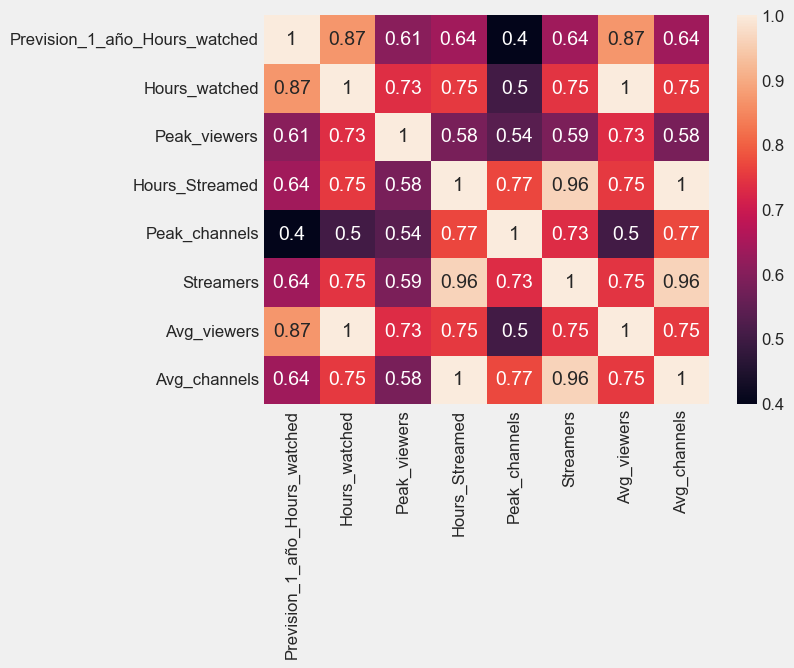

In [72]:
#MATRIZ DE CORRELACION PREVISION HOURS WATCHED-- VEMOS QUE DEBO ELIMINAR AVG.VIEWERS, STREAMERS Y AVG. CHANNELS
sns.heatmap(df_reg[['Prevision_1_año_Hours_watched','Hours_watched','Peak_viewers','Hours_Streamed','Peak_channels','Streamers','Avg_viewers','Avg_channels']].corr(), annot=True)

<AxesSubplot:>

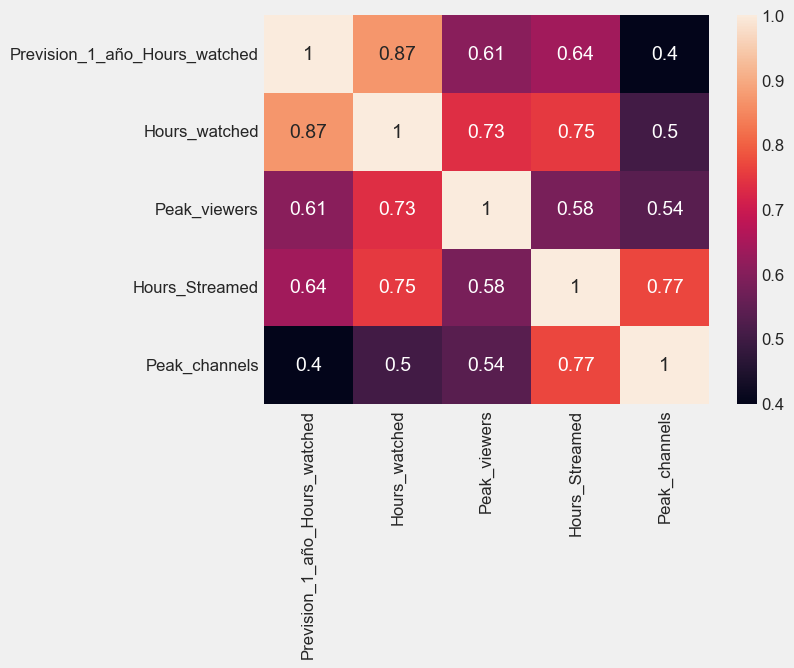

In [73]:
#MATRIZ DE CORRELACION PARA PREVISION HOURS WATCHED 
sns.heatmap(df_reg[['Prevision_1_año_Hours_watched','Hours_watched','Peak_viewers','Hours_Streamed','Peak_channels']].corr(), annot=True)

In [74]:
#OBETENER X_TRAIN,X_TEST,Y_TRAIN, Y_TEST -- TARGET=PREVISION HOURS_WATCHED 1 AÑO
x_y=df_reg[['Hours_watched','Peak_viewers','Hours_Streamed','Peak_channels','Prevision_1_año_Hours_watched']]
nueva_x_y= shuffle(x_y)

X_reg_hours_watched = x_y[['Hours_watched','Peak_viewers','Hours_Streamed','Peak_channels']]
y_reg_hours_watched = x_y['Prevision_1_año_Hours_watched']

X_train_reg_hours_watched, X_test_reg_hours_watched, y_train_reg_hours_watched, y_test_reg_hours_watched = train_test_split(X_reg_hours_watched, y_reg_hours_watched, test_size=0.2, random_state=42)


In [75]:
#ESTANDARIZACION 
scaler_reg = StandardScaler()

X_train_reg_hours_watched_std = scaler_reg.fit_transform(X_train_reg_hours_watched)
X_test_reg_hours_watched_std = scaler_reg.transform(X_test_reg_hours_watched)

In [76]:
#LINEAR REGRESSION
model = LinearRegression()
model=model.fit(X_train_reg_hours_watched_std, y_train_reg_hours_watched)
y_pred=model.predict(X_test_reg_hours_watched_std)
results_lr=r2_score(y_test_reg_hours_watched, y_pred)
results_lr

0.6755242304358041

In [77]:
#REGULARIZADO CON RIDGE
ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]} # 10 ALPHAS DIFERENTES
ridge_regressor = GridSearchCV(ridge, parameters, cv=5, error_score=np.nan) # 5 trozos
ridge_regressor=ridge_regressor.fit(X_train_reg_hours_watched_std, y_train_reg_hours_watched)
y_pred = ridge_regressor.predict(X_test_reg_hours_watched_std)
lr_ridge= r2_score(y_test_reg_hours_watched, y_pred)
lr_ridge

0.677866027635692

In [78]:
#REGULARIZADO CON LASSO
lasso = Lasso()
parameters = {'alpha': [1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5, error_score=np.nan)
lasso_regressor=lasso_regressor.fit(X_train_reg_hours_watched_std, y_train_reg_hours_watched)
y_pred = lasso_regressor.predict(X_test_reg_hours_watched_std)
lr_lasso= r2_score(y_test_reg_hours_watched, y_pred)
lr_lasso

0.6755253739515855

In [79]:
#REGULARIZADO CON ELASTICNET
elastic = ElasticNet(alpha=100, l1_ratio=0.99)
elastic.fit(X_train_reg_hours_watched_std, y_train_reg_hours_watched)
y_pred = elastic.predict(X_test_reg_hours_watched_std)
lr_elastic=r2_score(y_test_reg_hours_watched, y_pred)
lr_elastic


0.6288821309937402

In [80]:
#DECISION TREE REGRESSOR
tree_reg1 = DecisionTreeRegressor() 
parameters = {'max_depth': [2,4,6],
'min_samples_leaf': np.arange(1,4)}
rf_reg_clf = GridSearchCV(tree_reg1,parameters, cv=5)
rf_reg_clf=rf_reg_clf.fit(X_train_reg_hours_watched_std, y_train_reg_hours_watched)
y_pred = rf_reg_clf.predict(X_test_reg_hours_watched_std)
results_tr = r2_score(y_test_reg_hours_watched, y_pred)
results_tr

0.7410622942709442

In [81]:
#GRADIENTBOOSTREGRESSOR
from sklearn.ensemble import GradientBoostingRegressor
gbrt_hours = GradientBoostingRegressor()
parameters = {'max_depth': [2,4,6],
'min_samples_leaf': np.arange(1,4)}
gbrt_hours = GridSearchCV(gbrt_hours,parameters, cv=5)
gbrt_hours.fit(X_train_reg_hours_watched_std, y_train_reg_hours_watched)
y_pred = gbrt_hours.predict(X_test_reg_hours_watched_std)
results_gbrt = r2_score(y_test_reg_hours_watched, y_pred)
results_gbrt


0.7743716867345015

In [82]:
#XGBOSST REGRESSOR
import xgboost
xgb_reg_hours = xgboost.XGBRegressor()
xgb_reg_hours=xgb_reg_hours.fit(X_train_reg_hours_watched_std, y_train_reg_hours_watched)
y_pred = xgb_reg_hours.predict(X_test_reg_hours_watched_std)
results_xgbr = r2_score(y_test_reg_hours_watched, y_pred)
results_xgbr

0.7848720429142366

In [83]:
resultados_regresion = [results_lr,lr_ridge,lr_lasso,lr_elastic,results_tr,results_gbrt, results_xgbr]
algoritmos_regresion = ["Linear Regresion","Linear Regresion con Ridge","Linear Regresion con Lasso","Linear Regresion con Elastic","Arbol de regresion","Gradient Boost regresor", "XGBoost Regresor"]

result_regresion = pd.Series(resultados_regresion, algoritmos_regresion).sort_values(ascending=False)
result_regresion

XGBoost Regresor                0.784872
Gradient Boost regresor         0.774372
Arbol de regresion              0.741062
Linear Regresion con Ridge      0.677866
Linear Regresion con Lasso      0.675525
Linear Regresion                0.675524
Linear Regresion con Elastic    0.628882
dtype: float64

In [84]:
resultado_regresion= pd.DataFrame(result_regresion)
resultado_regresion=resultado_regresion.reset_index()
resultado_regresion.rename(columns={"index":"Modelo",0:"Score R2"},
               inplace=True)
resultado_regresion

,Modelo,Score R2
0,XGBoost Regresor,0.784872
1,Gradient Boost regresor,0.774372
2,Arbol de regresion,0.741062
3,Linear Regresion con Ridge,0.677866
4,Linear Regresion con Lasso,0.675525
5,Linear Regresion,0.675524
6,Linear Regresion con Elastic,0.628882


In [85]:
resultado_regresion.to_csv("CSV/Score Regresion.csv", sep=",", index = True)

In [121]:
df_enero_reg=t2023[['Hours_watched','Peak_viewers','Hours_Streamed','Peak_channels']]

In [87]:
#PREDICCION ENERO 2023 CON XGBOOST REGRESSOR

muestra_reg_std = scaler_reg.transform(df_enero_reg)

xgboost_r = xgboost.XGBRegressor()
xgb_reg_hours=xgboost_r.fit(X_train_reg_hours_watched_std, y_train_reg_hours_watched)
prediccion_XGBOOSTREG_2023= xgboost_r.predict(muestra_reg_std)
prediccion_reg_df=pd.DataFrame(prediccion_XGBOOSTREG_2023)
print(prediccion_reg_df)

                0
0    2.843109e+08
1    1.424622e+08
2    1.152563e+08
3    1.153386e+08
4    6.975830e+07
..            ...
195  1.086682e+06
196  1.122340e+06
197  1.128712e+06
198  9.013369e+05
199  1.014189e+06

[200 rows x 1 columns]


In [88]:
joblib.dump(xgboost_r, 'modelo_XGBoostRegressor_entrenado.pkl')

['modelo_XGBoostRegressor_entrenado.pkl']

In [89]:
#FEATURE IMPORTANCE DE LAS COLUMNAS DE XGBOOST REGRESSOR
dec= DecisionTreeRegressor()
dec.fit(X_train_reg_hours_watched_std, y_train_reg_hours_watched)
decision=dec.feature_importances_
e=['Hours_watched','Peak_viewers','Hours_Streamed','Peak_channels']
feature_importance_regresion = pd.Series(decision, e).sort_values(ascending=False)
feature_importance_regresion

Hours_watched     0.831053
Hours_Streamed    0.078639
Peak_viewers      0.055489
Peak_channels     0.034819
dtype: float64

In [90]:
feature_imp_reg= pd.DataFrame(feature_importance_regresion)
feature_imp_reg=feature_imp_reg.reset_index()
feature_imp_reg.rename(columns={"index":"Columna",0:"Feature_importance"},
               inplace=True)
feature_imp_reg

,Columna,Feature_importance
0,Hours_watched,0.831053
1,Hours_Streamed,0.078639
2,Peak_viewers,0.055489
3,Peak_channels,0.034819


In [91]:
feature_imp_reg.to_csv("CSV/Feature importance Regresion.csv", sep=",", index = True)

In [92]:
prediccion_reg_2023= pd.DataFrame(prediccion_reg_df)
prediccion_reg_2023.rename(columns={0:"Hours Watched 2024"},
               inplace=True)
prediccion_reg_2023

,Hours Watched 2024
0,2.843109e+08
1,1.424622e+08
2,1.152563e+08
3,1.153386e+08
4,6.975830e+07
...,...
195,1.086682e+06
196,1.122340e+06
197,1.128712e+06
198,9.013369e+05


In [122]:
df_enero=df_enero.reset_index()

In [123]:
prediccion_enero=pd.concat([df_enero,prediccion_reg_2023],axis=1)

In [124]:
prediccion_enero["Diferencia Hours Watched (%)"]=((prediccion_enero["Hours Watched 2024"]-prediccion_enero["Hours_watched"])/prediccion_enero["Hours_watched"])*100

In [131]:

#prediccion_enero=prediccion_enero.reset_index()
prediccion_enero=prediccion_enero.set_index("Game")


In [132]:
prediccion_enero

,Hours_watched,Prediccion enero 2024:1 seguirá/0 no seguirá,Hours Watched 2024,Diferencia Hours Watched (%)
Game,,,,
Just Chatting,264212906.0,1,2.843109e+08,7.606759
League of Legends,126494155.0,1,1.424622e+08,12.623525
Escape from Tarkov,113747925.0,1,1.152563e+08,1.326072
Grand Theft Auto V,111789032.0,1,1.153386e+08,3.175195
VALORANT,80943179.0,1,6.975830e+07,-13.818191
...,...,...,...,...
Tom Clancy's The Division 2,666943.0,1,1.086682e+06,62.934689
Persona 5 Royal,664503.0,1,1.122340e+06,68.899125
Bloodborne,663078.0,1,1.128712e+06,70.223149


In [133]:
prediccion_enero['Hours_watched'] = prediccion_enero['Hours_watched'].astype(float)
prediccion_enero['Hours Watched 2024'] = prediccion_enero['Hours Watched 2024'].astype(float)
prediccion_enero['Diferencia Hours Watched (%)'] = prediccion_enero['Diferencia Hours Watched (%)'].astype(float)

In [105]:
prediccion_enero.to_csv("CSV/Prediccion enero 2024.csv", sep=",", index = True)

In [134]:
juegos_mas_crecimiento=prediccion_enero['Diferencia Hours Watched (%)'].sort_values(ascending=False).head(15)
juegos_mas_crecimiento= pd.DataFrame(juegos_mas_crecimiento)
#juegos_mas_crecimiento=juegos_mas_crecimiento.reset_index()
juegos_mas_crecimiento


,Diferencia Hours Watched (%)
Game,
F1 22,1608.016934
Hunt: Showdown,1058.042045
Ark: Survival Evolved,711.528188
Phasmophobia,504.540777
Red Dead Redemption 2,415.311183
Monster Hunter Rise,384.149497
Dark Souls II,353.118401
Hi-Fi Rush,340.766045
Mobile Legends: Bang Bang,295.115030


In [135]:
juegos_mas_crecimiento.to_csv("CSV/Juegos con mayor crecimiento.csv", sep=",", index = True)